# Math 466 Spring 2025

## Lec 16. Demo: Spectral Clustering




---



This file has demo codes of 

- generating similarity graph

- compute graph Laplacian

- spectral clustering


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Step 0: generate data

We use the ```make_circles``` and ```make_moons``` functions. 

In [3]:
random_state = 2024

X_circle, y_circle = make_circles(
    n_samples=100, factor=0.5, noise=0.08, random_state=random_state
)
X_moon, y_moon = make_moons(n_samples=100, noise=0.08, random_state=random_state)



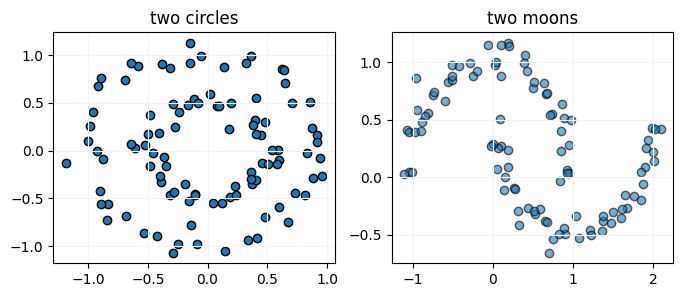

In [4]:
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1,2,1)
# Plot two circles
# ax.scatter(X_circle[:, 0], X_circle[:, 1], 
#            c=y_circle, cmap= 'jet', edgecolors='k')
ax.scatter(X_circle[:, 0], X_circle[:, 1], edgecolors='k')
plt.grid(color='0.95')
plt.title('two circles')

ax = fig.add_subplot(1,2,2)
# Plot two moons
# ax.scatter(X_moon[:, 0], X_moon[:, 1], 
#            c=y_moon, cmap= 'jet', alpha=0.6,edgecolors='k')
ax.scatter(X_moon[:, 0], X_moon[:, 1], alpha=0.6,edgecolors='k')

plt.grid(color='0.95')
plt.title('two moons')
plt.show()

### Step 1: generate similarity graph


In [5]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph


adjmat_circle_eps = radius_neighbors_graph(X_circle, 0.3, mode='connectivity')
adjmat_moon_eps = radius_neighbors_graph(X_moon, 0.3, mode='connectivity')

adjmat_circle = kneighbors_graph(X_circle, 5, mode='distance')
adjmat_circle_knn = adjmat_circle.maximum(adjmat_circle.transpose())
adjmat_circle_mknn = adjmat_circle.minimum(adjmat_circle.transpose())

adjmat_moon = kneighbors_graph(X_moon, 5, mode='distance')
adjmat_moon_knn = adjmat_moon.maximum(adjmat_moon.transpose())
adjmat_moon_mknn = adjmat_moon.minimum(adjmat_moon.transpose())


<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:38: SyntaxWarning: invalid escape sequence '\e'
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/4281605434.py:20: SyntaxWarning: invalid escape sequence '\e'
  plot_graph(X_circle,adjmat_circle_eps,ax,'$\epsilon$-neighbourhood graph')
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/4281605434.py:38: SyntaxWarning: invalid escape sequence '\e'
  plot_graph(X_moon,adjmat_moon_eps,ax,'$\epsilon$-neighbourhood graph')


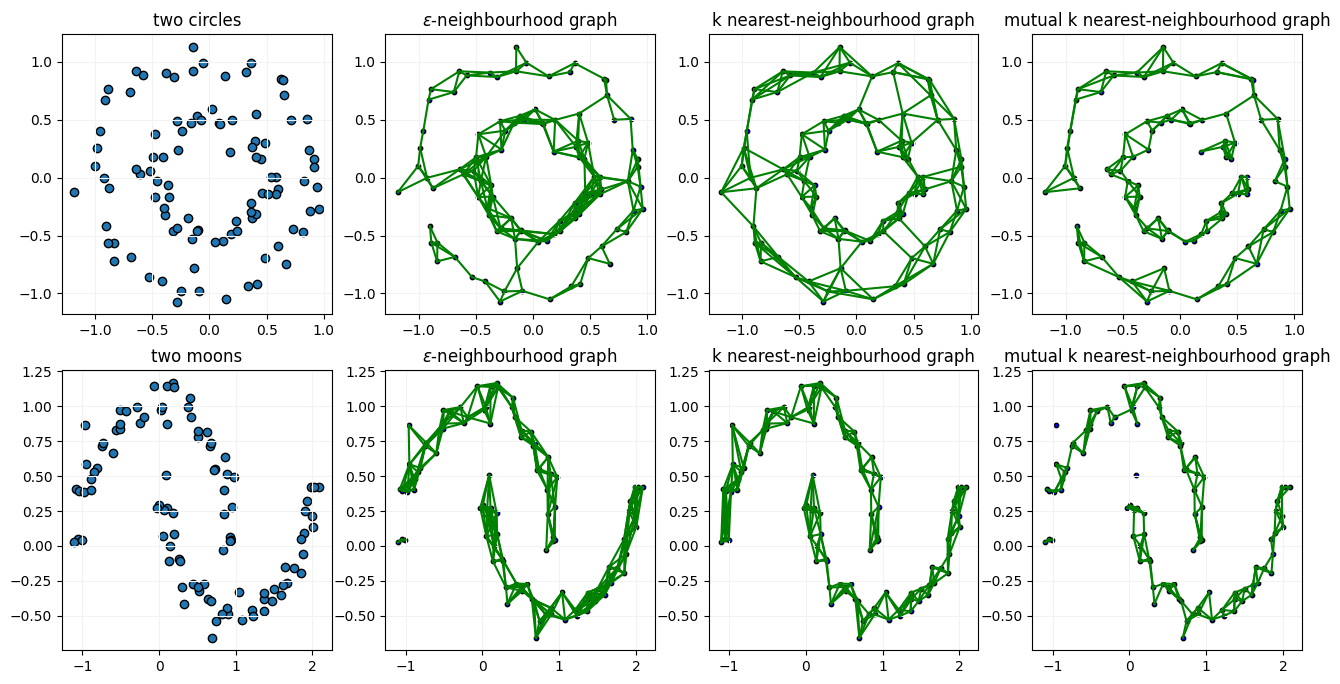

In [6]:
def plot_graph(X,adjmat,ax,tt):
    ax.scatter(X[:, 0], X[:, 1], c='b', marker='o', edgecolors='k', s=10)
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            if adjmat[i, j] > 0:
                ax.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 'g-', alpha=1)
    plt.grid(color='0.95')
    plt.title(tt)        

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(2,4,1)
# Plot two circles
ax.scatter(X_circle[:, 0], X_circle[:, 1], edgecolors='k')
plt.grid(color='0.95')
plt.title('two circles')

ax = fig.add_subplot(2,4,2)
# Plot eps graph
plot_graph(X_circle,adjmat_circle_eps,ax,'$\epsilon$-neighbourhood graph')

ax = fig.add_subplot(2,4,3)
# Plot eps graph
plot_graph(X_circle,adjmat_circle_knn,ax,'k nearest-neighbourhood graph')

ax = fig.add_subplot(2,4,4)
# Plot eps graph
plot_graph(X_circle,adjmat_circle_mknn,ax,'mutual k nearest-neighbourhood graph')

ax = fig.add_subplot(2,4,5)
# Plot two moons
ax.scatter(X_moon[:, 0], X_moon[:, 1], edgecolors='k')
plt.grid(color='0.95')
plt.title('two moons')

ax = fig.add_subplot(2,4,6)
# Plot eps graph
plot_graph(X_moon,adjmat_moon_eps,ax,'$\epsilon$-neighbourhood graph')

ax = fig.add_subplot(2,4,7)
# Plot eps graph
plot_graph(X_moon,adjmat_moon_knn,ax,'k nearest-neighbourhood graph')

ax = fig.add_subplot(2,4,8)
# Plot eps graph
plot_graph(X_moon,adjmat_moon_mknn,ax,'mutual k nearest-neighbourhood graph')


plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/3189656755.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$\epsilon$=%.3f' % (eps_list[i]))


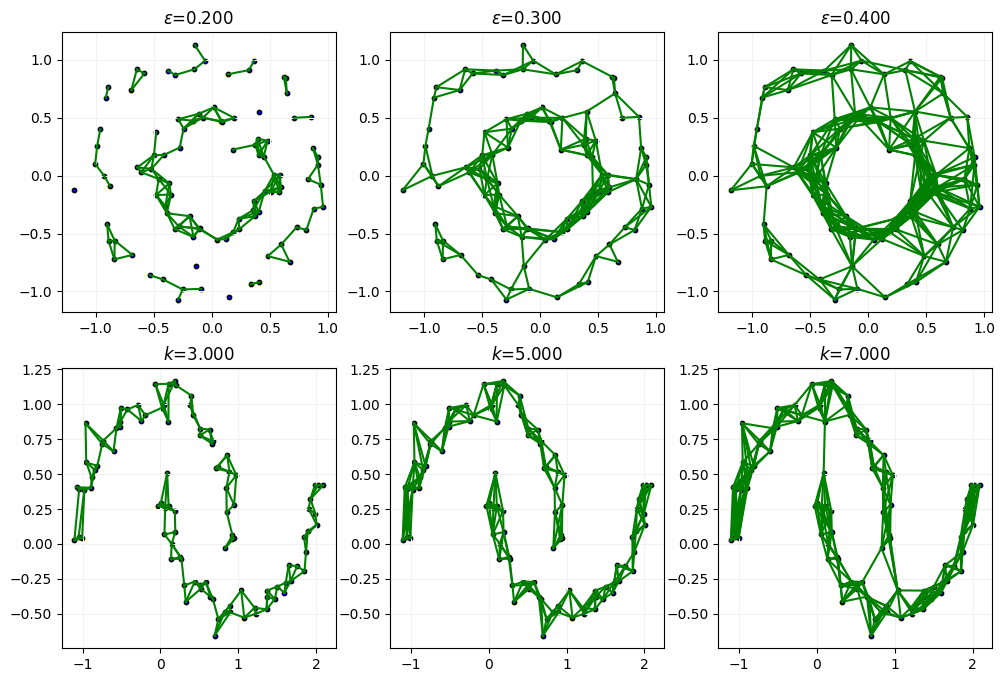

In [7]:
fig = plt.figure(figsize=(12, 8))

eps_list = [0.2, 0.3, 0.4]
for i in range(len(eps_list)):
    adjmat_circle_eps = radius_neighbors_graph(X_circle, eps_list[i], mode='connectivity')
    ax = fig.add_subplot(2,3,i+1)
    plot_graph(X_circle,adjmat_circle_eps,ax,'')
    plt.title('$\epsilon$=%.3f' % (eps_list[i]))

k_list = [3,5,7]
for i in range(len(k_list)):
    adjmat_moon = kneighbors_graph(X_moon, k_list[i], mode='distance')
    adjmat_moon_knn = adjmat_moon.maximum(adjmat_moon.transpose())
    ax = fig.add_subplot(2,3,i+4)
    plot_graph(X_moon,adjmat_moon_knn,ax,'')
    plt.title('$k$=%.3f' % (k_list[i]))




### Step 2: compute graph Laplacian

take two circle, k nearest-neighbourhood graph as an example


ideal case

Text(0.5, 1.0, 'Sparsity Pattern of L after reordering')

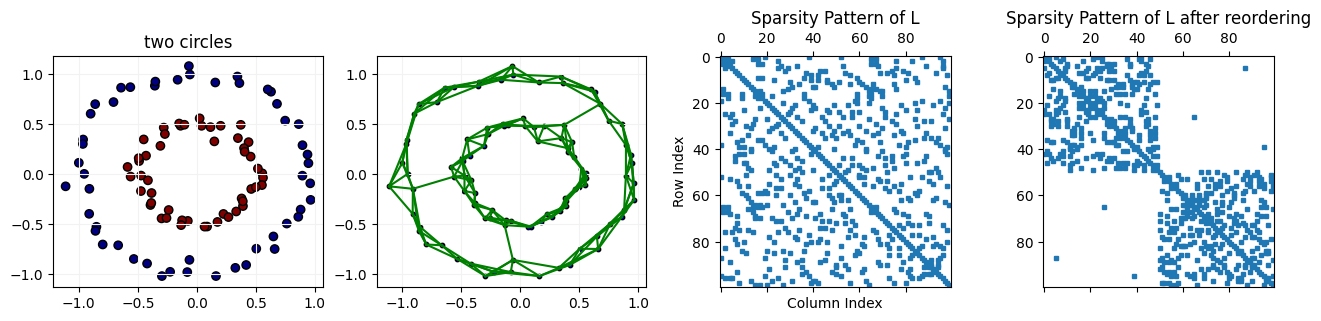

In [8]:
from scipy.sparse import csr_matrix

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=random_state
)

fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(1,4,1)
# Plot two circles
plt.scatter(X[:, 0], X[:, 1], 
           c=y, cmap= 'jet', edgecolors='k')
plt.grid(color='0.95')
plt.title('two circles')

# plot graph
adjmat = kneighbors_graph(X, 5, mode='distance')
adjmat = adjmat.maximum(adjmat.transpose())
ax = fig.add_subplot(1,4,2)
plot_graph(X,adjmat,ax,'')

# compute and view graph Laplacian
d = np.array(adjmat.sum(axis=1)).flatten()
n = adjmat.shape[0]
d_sparse = csr_matrix((d, (range(n), range(n))), shape=(n, n))  # Diagonal matrix D as sparse
lapmat = d_sparse - adjmat

ax = fig.add_subplot(1,4,3)
plt.spy(lapmat, markersize=3)
plt.title('Sparsity Pattern of L')
plt.xlabel('Column Index')
plt.ylabel('Row Index')


sorted_indices = np.argsort(y)
# Reorder rows and columns of matrix L
lapmat_sorted = lapmat[sorted_indices][:, sorted_indices]
ax = fig.add_subplot(1,4,4)
plt.spy(lapmat_sorted, markersize=3)
plt.title('Sparsity Pattern of L after reordering')


noisy case

Text(0.5, 1.0, 'Sparsity Pattern of L after reordering')

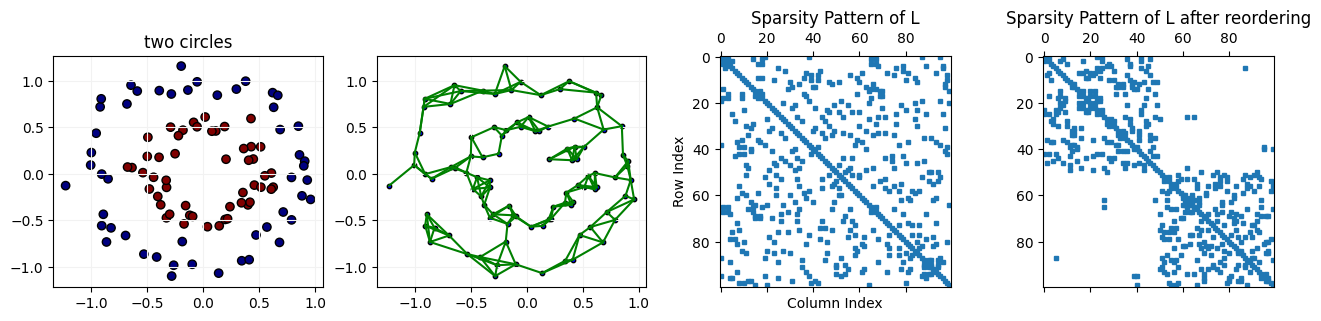

In [9]:
from scipy.sparse import csr_matrix

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.1, random_state=random_state
)

fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(1,4,1)
# Plot two circles
plt.scatter(X[:, 0], X[:, 1], 
           c=y, cmap= 'jet', edgecolors='k')
plt.grid(color='0.95')
plt.title('two circles')

# plot graph
adjmat = kneighbors_graph(X, 5, mode='distance')
adjmat = adjmat.minimum(adjmat.transpose())
ax = fig.add_subplot(1,4,2)
plot_graph(X,adjmat,ax,'')

# compute and view graph Laplacian
d = np.array(adjmat.sum(axis=1)).flatten()
n = adjmat.shape[0]
d_sparse = csr_matrix((d, (range(n), range(n))), shape=(n, n))  # Diagonal matrix D as sparse
lapmat = d_sparse - adjmat

ax = fig.add_subplot(1,4,3)
plt.spy(lapmat, markersize=3)
plt.title('Sparsity Pattern of L')
plt.xlabel('Column Index')
plt.ylabel('Row Index')


sorted_indices = np.argsort(y)
# Reorder rows and columns of matrix L
lapmat_sorted = lapmat[sorted_indices][:, sorted_indices]
ax = fig.add_subplot(1,4,4)
plt.spy(lapmat_sorted, markersize=3)
plt.title('Sparsity Pattern of L after reordering')


### Step 3: spectral clustering


ideal case

<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/1875381986.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$u_1$ with $\lambda_1$=%.3f' %(eigval[0]))
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/1875381986.py:41: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$u_2$ with $\lambda_2$=%.3f' %(eigval[1]))


Text(0.5, 0, 'Data Index')

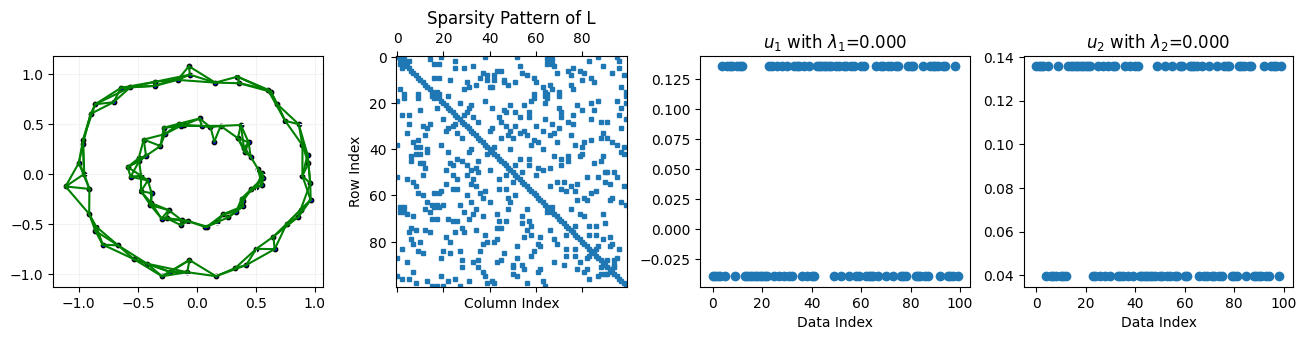

In [10]:
from scipy.sparse.linalg import eigsh

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=random_state
)

fig = plt.figure(figsize=(16, 3))
# plot graph
adjmat = kneighbors_graph(X, 5, mode='distance')
adjmat = adjmat.minimum(adjmat.transpose())
ax = fig.add_subplot(1,4,1)
plot_graph(X,adjmat,ax,'')

# compute and view graph Laplacian
d = np.array(adjmat.sum(axis=1)).flatten()
n = adjmat.shape[0]
d_sparse = csr_matrix((d, (range(n), range(n))), shape=(n, n))  # Diagonal matrix D as sparse
lapmat = d_sparse - adjmat

ax = fig.add_subplot(1,4,2)
plt.spy(lapmat, markersize=3)
plt.title('Sparsity Pattern of L')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# compute smallest eigenvalues and corresponding eigenvectors
# and view first and second eigenvectors
num_eigval = 2
eigval, eigvec = eigsh(lapmat, k=num_eigval, which='SA')
first_eigvec = eigvec[:, 0]
second_eigvec = eigvec[:, 1]

# Plot the first eigenvector
ax = fig.add_subplot(1,4,3)
plt.scatter(range(len(first_eigvec)), first_eigvec)
plt.title('$u_1$ with $\lambda_1$=%.3f' %(eigval[0]))
plt.xlabel('Data Index')

ax = fig.add_subplot(1,4,4)
plt.scatter(range(len(second_eigvec)), second_eigvec)
plt.title('$u_2$ with $\lambda_2$=%.3f' %(eigval[1]))
plt.xlabel('Data Index')



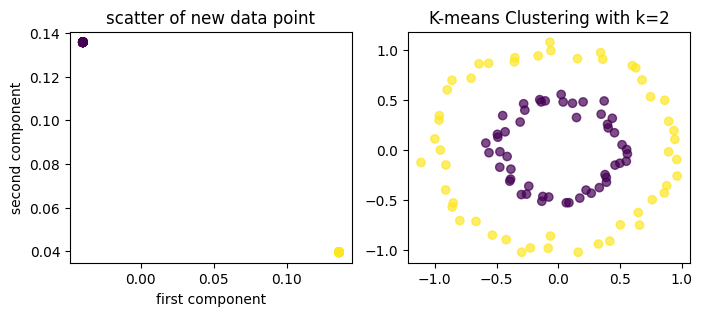

In [11]:
from sklearn.cluster import KMeans

X_new = eigvec
# plot new data points
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1,2,1)
plt.scatter(X_new[:,0], X_new[:,1],c=y)
plt.title('scatter of new data point')
plt.xlabel('first component')
plt.ylabel('second component')

# apply k-means to new datapoint and plot clustering result
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_new)

centroids = kmeans.cluster_centers_
y_fit = kmeans.labels_

ax = fig.add_subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_fit, cmap='viridis', alpha=0.7) 
plt.title('K-means Clustering with k=2')
plt.show()

Repeat for noisy case

array([1.87796419e-17, 1.27161620e-03, 4.05884440e-03, 6.52912924e-03,
       1.29684932e-02, 2.19042161e-02, 2.45129964e-02, 4.23714252e-02,
       4.47193291e-02, 6.14431895e-02])

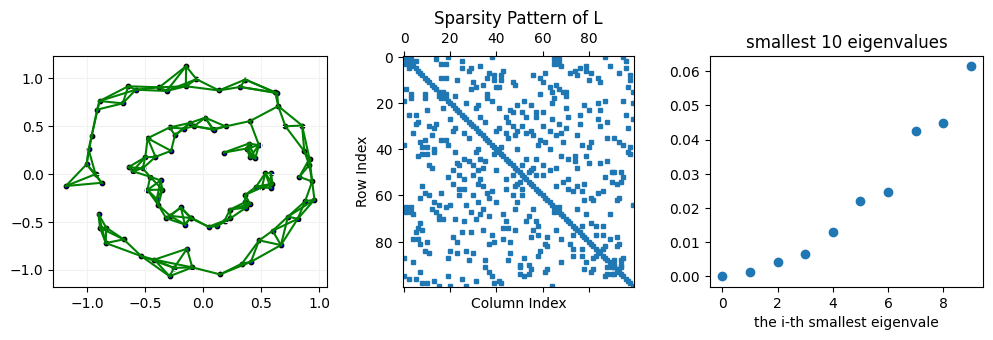

In [12]:
from scipy.sparse.linalg import eigsh

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.08, random_state=random_state
)

fig = plt.figure(figsize=(12, 3))
# plot graph
adjmat = kneighbors_graph(X, 5, mode='distance')
adjmat = adjmat.minimum(adjmat.transpose())
ax = fig.add_subplot(1,3,1)
plot_graph(X,adjmat,ax,'')

# compute and view graph Laplacian
d = np.array(adjmat.sum(axis=1)).flatten()
n = adjmat.shape[0]
d_sparse = csr_matrix((d, (range(n), range(n))), shape=(n, n))  # Diagonal matrix D as sparse
lapmat = d_sparse - adjmat

ax = fig.add_subplot(1,3,2)
plt.spy(lapmat, markersize=3)
plt.title('Sparsity Pattern of L')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# compute smallest 10 eigenvalues and corresponding eigenvectors
# and view eigenvalues
num_eigval = 10
eigval, eigvec = eigsh(lapmat, k=num_eigval, which='SA')

ax = fig.add_subplot(1,3,3)
plt.scatter(range(len(eigval)), eigval)
plt.title('smallest 10 eigenvalues')
plt.xlabel('the i-th smallest eigenvale')

eigval

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/4136374912.py:11: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$u_1$ with $\lambda_1$=%.3f' %(eigval[0]))
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/4136374912.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$u_2$ with $\lambda_2$=%.3f' %(eigval[1]))
/var/folders/hf/488pj_hn3xl2zfbyrlbxn0rw0000gq/T/ipykernel_51379/4136374912.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$u_3$ with $\lambda_3$=%.3f' %(eigval[2]))


Text(0.5, 0, 'Data Index')

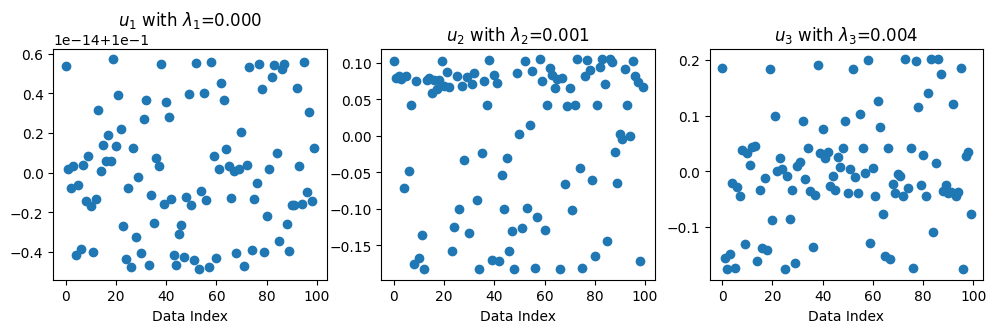

In [13]:
fig = plt.figure(figsize=(12, 3))


first_eigvec = eigvec[:, 0]
second_eigvec = eigvec[:, 1]
third_eigvec = eigvec[:, 2]

# Plot the first eigenvector
ax = fig.add_subplot(1,3,1)
plt.scatter(range(len(first_eigvec)), first_eigvec)
plt.title('$u_1$ with $\lambda_1$=%.3f' %(eigval[0]))
plt.xlabel('Data Index')

# plot the second eigenvector
ax = fig.add_subplot(1,3,2)
plt.scatter(range(len(second_eigvec)), second_eigvec)
plt.title('$u_2$ with $\lambda_2$=%.3f' %(eigval[1]))
plt.xlabel('Data Index')

# plot the third eigenvector
ax = fig.add_subplot(1,3,3)
plt.scatter(range(len(third_eigvec)), third_eigvec)
plt.title('$u_3$ with $\lambda_3$=%.3f' %(eigval[2]))
plt.xlabel('Data Index')


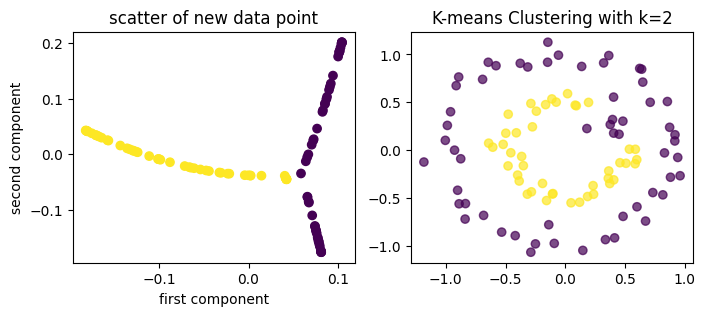

In [14]:
fig = plt.figure(figsize=(8, 3))

X_new = eigvec[:,1:4]
# plot new data points
ax = fig.add_subplot(1,2,1)
plt.scatter(X_new[:,0], X_new[:,1], c=y)
plt.title('scatter of new data point')
plt.xlabel('first component')
plt.ylabel('second component')

# apply k-means to new datapoint and plot clustering result
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_new)

centroids = kmeans.cluster_centers_
y_fit = kmeans.labels_

ax = fig.add_subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_fit, cmap='viridis', alpha=0.7) 
plt.title('K-means Clustering with k=2')
plt.show()